In [36]:
# Load python libraries
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
## Loading data to process

# Path where you store the csv file on your local disk
path_to_data = 'opensponsorship data/task3/'

# Load data as a dataframe using pandas
athlete_data = pd.read_csv(path_to_data + 'Athlete Search Test - Sheet1.csv')

In [38]:
# Change column datatypes

# List of columns to convert to datetime
columns_to_convert = ['date', 'view_created']

# Convert the columns to datetime data type
athlete_data[columns_to_convert] = athlete_data[columns_to_convert].apply(pd.to_datetime, errors='coerce')

athlete_data.info() # Check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   search_id          5206 non-null   object        
 1   date               5206 non-null   datetime64[ns]
 2   brand_userID       5206 non-null   object        
 3   brand_profileID    5206 non-null   object        
 4   planLevel          5206 non-null   int64         
 5   minPrice           3189 non-null   float64       
 6   maxPrice           4909 non-null   float64       
 7   view_id            1618 non-null   object        
 8   user               1618 non-null   object        
 9   path               1618 non-null   object        
 10  entity             1618 non-null   object        
 11  view_created       1618 non-null   datetime64[ns]
 12  athlete_userID     1123 non-null   object        
 13  athlete_profileID  1123 non-null   object        
 14  athlete_

##   Explore the distribution of plan levels in the dataset to see if there are any imbalances. 

In [40]:
# Different plan levels in the dataframe
athlete_data.planLevel.value_counts() ## More brands on plan0 than plan3

0    4607
3     599
Name: planLevel, dtype: int64

## Analyze the distribution of search dates to identify any seasonal patterns or trends over time. 

### Number of views made each month by brands in plan0 and plan3

In [41]:
# Create a new column with the month of views created
athlete_data['month_view'] = athlete_data['view_created'].dt.month

# Pivot the table to create separate columns for each month and check how many views each plan made every month
athlete_data.pivot_table(index='planLevel', columns='month_view', aggfunc='size', fill_value=0)

month_view,6.0,7.0,8.0,9.0
planLevel,,,,
0,289,533,335,58
3,28,34,232,109


### Number of searches made each month by brands in plan0 and plan3

In [42]:
# Create a new column with the month of searches made
athlete_data['month_search'] = athlete_data['date'].dt.month

# Pivot the table to create separate columns for each month and check how many searches each plan made every month
athlete_data.pivot_table(index='planLevel', columns='month_search', aggfunc='size', fill_value=0)

month_search,1,2,3,4,5,6,7,8,9
planLevel,,,,,,,,,
0,852,802,547,562,494,501,576,273,0
3,0,0,0,0,0,0,0,321,278


## Checking if there are brands that switched from plan0 to plan3, brands that were just in plan0 and brands that were just in plan3

In [43]:
# Group by 'brand_profileID' and check if a brand has both 'Plan 0' and 'Plan 3'
check = athlete_data.groupby('brand_profileID')['planLevel'].agg(set)
check_both_plans = check.apply(lambda x: 0 in x and 3 in x)
check_just_plan_0 = check.apply(lambda x: 0 in x and 3 not in x)
check_just_plan_3 = check.apply(lambda x: 0 not in x and 3 in x)

In [44]:
print(f"{check_just_plan_0.sum()} brands were just in plan 0")
print(f"{check_just_plan_3.sum()} brands were just in plan 3")
print(f"{check_both_plans.sum()} brands switched from plan 0 to plan 3")

1302 brands were just in plan 0
152 brands were just in plan 3
12 brands switched from plan 0 to plan 3


[Text(0, 0, '1302'), Text(0, 0, '152'), Text(0, 0, '12')]

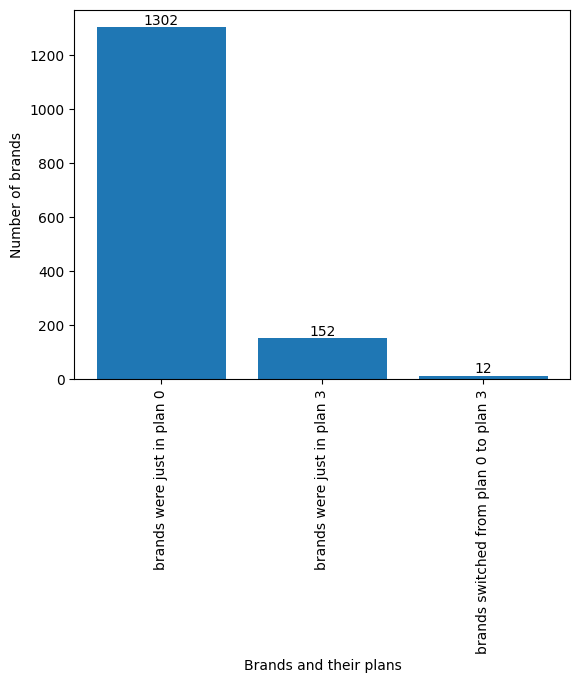

In [45]:
plans = ['brands were just in plan 0', 'brands were just in plan 3', 'brands switched from plan 0 to plan 3']
counts = [check_just_plan_0.sum(), check_just_plan_3.sum(), check_both_plans.sum()]

fig, ax = plt.subplots()
bars = ax.bar(plans, counts)

y_pos = range(len(plans))
plt.xticks(y_pos, plans, rotation=90)
plt.xlabel('Brands and their plans')
plt.ylabel('Number of brands')
# plt.title('Top 20 industries favourable to paid subscription')

ax.bar_label(bars)

In [25]:
# The brands with both plan0 and plan3 means that the brands were initially on free period 
# and then switched to paid subscription

# Get the brand profile IDs that have both plan levels
brands_with_both_levels = check_both_plans[check_both_plans == True].index.tolist()

print(f"{len(brands_with_both_levels)} Brand Profile IDs with both plan levels are:", brands_with_both_levels)

12 Brand Profile IDs with both plan levels are: ['5996f8d5769fe71ade969e48', '602735c9a003fd0d5a099b09', '6029e2a0dad94a0d72217a7a', '607265750c3d8a0d7f0ebbb1', '60d5879a803d7e0d754530db', '618d429fff90460d6b51744f', '61e9cefdd415820d5b994e1f', '62b6304eeac72f096d18bb90', '62c64ce1f830b80d7983d52e', '62d03698eb60bd0d8eb10afe', '62d999afcb4c2e0d637cf179', '62e254b76af9a70d7edc7b48']


In [46]:
# Get the brand profile IDs that have just plan 3
brands_with_just_plan3 = check_just_plan_3[check_just_plan_3 == True].index.tolist()

In [47]:
# Number of searches made by brands that were on plan 3 only every month
# i.e., brands that were not on free level - plan 0
plan3_only = athlete_data[athlete_data.brand_profileID.isin(brands_with_just_plan3)][['brand_profileID', 'planLevel',
                                                                                 'month_view', 'month_search']]

plan3_only.month_search.value_counts()

8    306
9    263
Name: month_search, dtype: int64

In [48]:
# Get the brand profile IDs that have just plan 0
brands_with_just_plan0 = check_just_plan_0[check_just_plan_0 == True].index.tolist()

In [49]:
# Number of searches made by brands that were on plan 0 only every month
# i.e., did not switch to plan 3

plan0_only = athlete_data[athlete_data.brand_profileID.isin(brands_with_just_plan0)][['brand_profileID', 'planLevel',
                                                                                 'month_view', 'month_search']]

plan0_only.month_search.value_counts()

1    845
2    793
7    569
4    559
3    546
5    493
6    488
8    264
Name: month_search, dtype: int64

## Time taken for brands to switch from plan0 to plan3 

In [50]:
# Get the rows of the brand users who upgraded from plan 0 to plan3 
# and just the columns required to calculate the time taken by each brand to 
# switch from plan 0 to plan 3

# Get the rows of the brand users who upgraded from plan 0 to plan3 
brands_with_plans_0_and_3 = athlete_data[athlete_data.brand_profileID.isin(brands_with_both_levels)]\
[['date', 'brand_userID', 'brand_profileID', 'planLevel']]

# Sort the DataFrame by 'brand_profileID' and 'date'
brands_with_plans_0_and_3 = brands_with_plans_0_and_3.sort_values(by=['brand_profileID', 'date'])
brands_with_plans_0_and_3

# To calculate the time taken to upgrade from plan 0 to plan 3

# Use transform to get the first occurrence of 'Plan 0' and the first occurrence of 'Plan 3' for each 'brand_profileID'
brands_with_plans_0_and_3['first_plan0_date'] = brands_with_plans_0_and_3.groupby('brand_profileID')['date'].transform('first')
brands_with_plans_0_and_3['first_plan3_date'] = brands_with_plans_0_and_3[brands_with_plans_0_and_3['planLevel'] == 3].groupby('brand_profileID')['date'].transform('first')

# Calculate the time difference between the first occurrence of 'Plan 0' and the first occurrence of 'Plan 3'
brands_with_plans_0_and_3['time_taken'] = brands_with_plans_0_and_3['first_plan3_date'] - brands_with_plans_0_and_3['first_plan0_date']

# Drop rows where 'time_taken' is NaT
result = brands_with_plans_0_and_3.dropna(subset=['time_taken']).drop_duplicates(subset='brand_profileID', keep='first')[['brand_profileID', 'first_plan0_date', 'first_plan3_date', 'time_taken']]

result

,brand_profileID,first_plan0_date,first_plan3_date,time_taken
594,5996f8d5769fe71ade969e48,2022-08-16 13:49:16,2022-08-16 13:49:16,0 days 00:00:00
36,602735c9a003fd0d5a099b09,2022-06-02 00:28:35,2022-09-15 04:16:49,105 days 03:48:14
537,6029e2a0dad94a0d72217a7a,2022-04-05 01:55:49,2022-08-18 21:01:32,135 days 19:05:43
427,607265750c3d8a0d7f0ebbb1,2022-08-12 18:16:11,2022-08-24 16:31:07,11 days 22:14:56
87,60d5879a803d7e0d754530db,2022-01-06 07:50:12,2022-09-12 22:46:22,249 days 14:56:10
519,618d429fff90460d6b51744f,2022-03-17 07:47:17,2022-08-19 11:41:38,155 days 03:54:21
278,61e9cefdd415820d5b994e1f,2022-02-22 08:13:08,2022-08-31 21:39:25,190 days 13:26:17
163,62b6304eeac72f096d18bb90,2022-06-24 21:48:40,2022-09-08 18:52:33,75 days 21:03:53
56,62c64ce1f830b80d7983d52e,2022-07-07 03:06:22,2022-09-13 17:57:17,68 days 14:50:55
314,62d03698eb60bd0d8eb10afe,2022-07-14 15:33:20,2022-08-29 10:36:19,45 days 19:02:59


## Investigate the distribution of minimum and maximum prices to understand the range of prices for different plan levels. 

In [115]:
athlete_data.groupby('planLevel')['minPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
planLevel,,,,,,,,
0,2769.0,1051.505598,7090.212660,0.0,100.0,100.0,600.0,250000.0
3,420.0,4074.369048,17358.502088,0.0,100.0,100.0,1000.0,100000.0


In [116]:
athlete_data.groupby('planLevel')['minPrice'].median()

planLevel
0    100.0
3    100.0
Name: minPrice, dtype: float64

In [114]:
athlete_data.groupby('planLevel')['maxPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
planLevel,,,,,,,,
0,4359.0,5922.769672,45175.272598,0.0,500.0,1000.0,3000.0,1000000.0
3,550.0,2448.954545,7082.126708,75.0,500.0,500.0,3000.0,110000.0


In [117]:
athlete_data.groupby('planLevel')['maxPrice'].median()

planLevel
0    1000.0
3     500.0
Name: maxPrice, dtype: float64

(array([3.162e+03, 6.000e+00, 1.000e+00, 0.000e+00, 1.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000., 250000.]),
 <BarContainer object of 10 artists>)

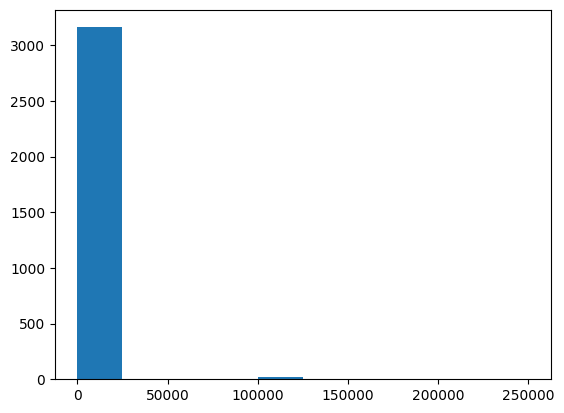

In [110]:
# Distribution of minPRices

plt.hist(athlete_data.minPrice)

(array([4.868e+03, 1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.900e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([      0.,  100000.,  200000.,  300000.,  400000.,  500000.,
         600000.,  700000.,  800000.,  900000., 1000000.]),
 <BarContainer object of 10 artists>)

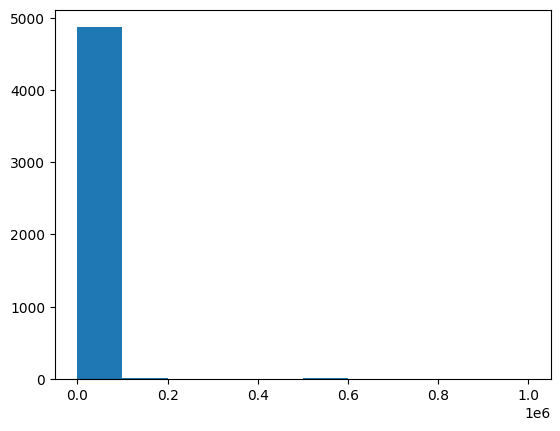

In [111]:
# Distribution of MAxPrice

plt.hist(athlete_data.maxPrice)

## Average number of views 

In [120]:
athlete_data.groupby('planLevel')['view_id'].aggregate('count')

planLevel
0    1215
3     403
Name: view_id, dtype: int64

## Number of monthly athlete views by plan

In [121]:
athlete_data.groupby('planLevel')['athlete_profileID'].aggregate('count')

planLevel
0    847
3    276
Name: athlete_profileID, dtype: int64

In [125]:
athlete_data.groupby(['planLevel', 'month_search'])['athlete_profileID'].aggregate('count')

planLevel  month_search
0          1                72
           2                42
           3                44
           4                59
           5                64
           6               111
           7               312
           8               143
3          8               147
           9               129
Name: athlete_profileID, dtype: int64